In [1]:
# EJERCICIO 1 ESTIMACION DE RESISTENCIA
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

In [2]:
# Simulacion
Rv = 30        # Referencia
N = 1000000    # Muestras
Vi = np.linspace(10,100,N)
Ii = (Vi/Rv) + np.random.normal(0,0.02,size=Vi.shape)
data =pd.DataFrame(data = {'Vi':Vi,'Ii':Ii})
data

,Vi,Ii
0,10.00000,0.316630
1,10.00009,0.347539
2,10.00018,0.306979
3,10.00027,0.329739
4,10.00036,0.372559
...,...,...
999995,99.99964,3.319386
999996,99.99973,3.355234
999997,99.99982,3.322439
999998,99.99991,3.326900


In [3]:
# R2 ESTIMACION POR ERROR EN VARIABLE
def est2(data):
    return np.average( data['Vi']) / np.average(data['Ii'] )
R2 = est2(data)
R2

In [4]:
# R3 ESTIMACIÓN POR MÍNIMOS CUADRADOS
def est3(data):
    N = len(data)
    return (sum(data['Vi']*data['Ii'])/N) / (sum(data['Ii']**2)/N)
R3 = est3(data)
R3

In [5]:
# R1 ESTIMACIÓN SIMPLE
def est1(data):
    return np.average( data['Vi'] / data['Ii'] )
R1 = est1(data)
R1

In [6]:
# GUARDO INFORMACION PARA LA GRAFICA
ns = range(50,10000,50)
R1Perf = []
R2Perf = []
R3Perf = []
for n in ns:
    data_sub = data.sample(n)
    R1Perf.append(est1(data_sub))
    R2Perf.append(est2(data_sub))
    R3Perf.append(est3(data_sub))
    
dataPerf = pd.DataFrame(data = {'muestras':ns,'Perf1':R1Perf,
                                'Perf2':R2Perf,'Perf3':R3Perf
                               })

<AxesSubplot:xlabel='muestras', ylabel='value'>

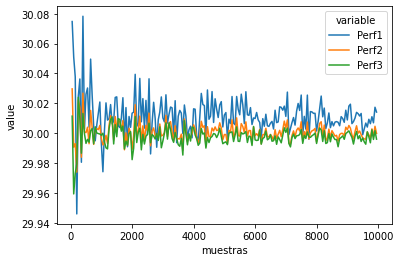

In [7]:
# GRAFICO
sns.lineplot(x='muestras', y='value', hue='variable', 
             data=pd.melt(dataPerf, ['muestras']))